In [137]:
import cv2
from google.colab.patches import cv2_imshow
import IPython
import numpy as np

## Load Yolo

1. 드라이브 마운트
2. 개별 파일 업로드

In [138]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [163]:
! ls '/content/drive/MyDrive/딥러닝/Lecture_deeplearning_basic-main/실습/dataset/yolo-traffic-sign/'

darknet		    traffic-train-yolo_1000.weights  Train.csv
result		    traffic-train-yolo_2000.weights  Train.zip
Test		    traffic-train-yolo.cfg
Traffic_test.ipynb  traffic-train-yolo_last.weights


In [181]:
cfg_file = '/content/drive/MyDrive/딥러닝/Lecture_deeplearning_basic-main/실습/dataset/yolo-traffic-sign/traffic-train-yolo.cfg'
weight_file = '/content/drive/MyDrive/딥러닝/Lecture_deeplearning_basic-main/실습/dataset/yolo-traffic-sign/traffic-train-yolo_1000.weights'

In [176]:
net = cv2.dnn.readNet(weight_file, cfg_file)
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

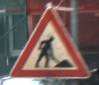

In [190]:
img_path = '/content/drive/MyDrive/딥러닝/Lecture_deeplearning_basic-main/실습/dataset/yolo-traffic-sign/Test/00410.png'
img = cv2.imread(img_path)
cv2_imshow(img)

In [191]:
class_names = ["Prohibitory", "Danger", "Mandatory", "Other"]

85 99 3
[0.         0.94574696 0.         0.        ] 1
1 Danger


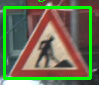

In [192]:
img = cv2.imread(img_path)
height, width, channels = img.shape
print(height, width, channels)

# Detecting objects
# https://docs.opencv.org/master/d6/d0f/group__dnn.html
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []
min_confidence = 0.3
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            print(scores, class_id)

            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(class_names[class_ids[i]])
        print(class_ids[i], label)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, label, (x, y - 10), font, 0.5, (0, 255, 0), 1)
cv2_imshow(img)